# How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import coint

C:\Users\visha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\visha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [5]:
from statsmodels.api import OLS

In [6]:
df1=pd.read_excel('GLD.xls')

In [7]:
df2=pd.read_excel('GDX.xls')

In [8]:
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.sort_index(inplace=True)

In [11]:
trainset=np.arange(0, 252)

In [12]:
df=df.iloc[trainset,]

## Run cointegration (Engle-Granger) test

In [13]:
coint_t, pvalue, crit_value=coint(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [14]:
(coint_t, pvalue, crit_value) # abs(t-stat) > critical value at 95%. pvalue says probability of null hypothesis (of no cointegration) is only 1.8%

(-2.35912683766873,
 0.34444948804278563,
 array([-3.94060523, -3.36058133, -3.06139039]))

## Determine hedge ratio

In [15]:
model=OLS(df['Adj Close_GLD'], df['Adj Close_GDX'])

In [16]:
results=model.fit()

In [17]:
hedgeRatio=results.params

In [18]:
hedgeRatio

Adj Close_GDX    1.631009
dtype: float64

##  spread = GLD - hedgeRatio*GDX

In [19]:
spread=df['Adj Close_GLD']-hedgeRatio[0]*df['Adj Close_GDX']

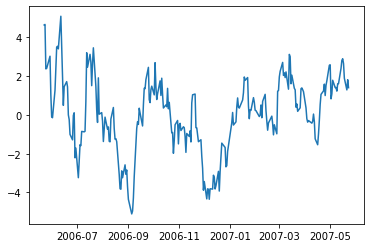

In [20]:
plt.plot(spread)